In [1]:
import pandas as pd
import joblib

from src import *

In [2]:
## First, read parameter file. This file contains some parameters that can be changed.
paraFile = "paraInit.csv"
paras = pd.read_csv(paraFile, sep=",", header=0)
useDerived = paras.loc[paras["pName"] == "derivedFeatFlag", "pValue"].values[0]
verbose = 0  ## Sets level of verbosity for some functions - 0 means not very


In [3]:
userDataFile = "userData.csv"
userDataMat = pd.read_csv(userDataFile)
userDataMat = digiCot(userDataMat)

> Digitizing cotinine data ... Done



In [4]:
codeBookFile = "codebook_linAge2.csv"
codeBook = pd.read_csv(codeBookFile)

incList = markIncsFromCodeBook(codeBook)

boxCox_lam = pd.read_csv("logNoLog.csv").iloc[1:2, :]


dataMat_trans = pd.read_csv('artifacts/dataMat_trans.csv')
qDataMat = pd.read_csv('artifacts/qDataMat.csv')

vMatDat99_F = pd.read_csv("vMatDat99_F_pre.csv").values
vMatDat99_M = pd.read_csv("vMatDat99_M_pre.csv").values

In [5]:
dataFileName = "mergedDataNHANES9902.csv"
masterData = pd.read_csv(dataFileName)
dataMat = dropCols(masterData, incList) 
qDataMat = qDataMatGen(masterData, incList)

coxCovsTrainM = pd.read_csv('artifacts/coxCovsTrainM.csv')
coxCovsTrainF = pd.read_csv('artifacts/coxCovsTrainF.csv')

In [6]:
# Load
coxModelF = joblib.load("artifacts/cox_full_F.joblib")
nullModelF = joblib.load("artifacts/cox_null_F.joblib")

coxModelM = joblib.load("artifacts/cox_full_M.joblib")
nullModelM = joblib.load("artifacts/cox_null_M.joblib")

In [7]:
dataMat_user = dropCols(userDataMat, incList)  ## User data matrix for clock


qDataMat_user = qDataMatGen(userDataMat, incList)

sex_user = qDataMat_user["RIAGENDR"].values
initAge_user = qDataMat_user["RIDAGEEX"].values

In [8]:
dataMat_user_R = pd.read_csv('dataMat_userR.csv')
qDataMat_user_R = pd.read_csv('qDataMat_user_R.csv')

In [9]:
pd.testing.assert_frame_equal(qDataMat_user, qDataMat_user_R[:2], check_dtype=False)

In [10]:
dataMat_user_R

,SEQN,BPXPLS,BPXSAR,BPXDAR,BMXBMI,URXUMASI,URXUCRSI,LBDIRNSI,LBDTIBSI,LBXPCT,...,LBDSCRSI,LBXSNASI,LBXSKSI,LBXSCLSI,LBDSGBSI,fs1Score,fs2Score,fs3Score,LDLV,crAlbRat
0,8881,68,111,50,31.31,96.9,18210,19.87,54.95,36.2,...,79.6,142.4,4.35,101.6,36,0.227273,0,3,2.6746,47.040771
1,9106,50,154,74,23.13,8.9,13702,28.64,61.04,46.9,...,70.7,139.4,4.08,100.8,26,0.090909,0,2,3.6980,5.742046
2,100002,68,98,56,24.90,9.1,12818,11.64,71.60,16.3,...,61.9,144.1,4.06,104.5,27,0.136364,0,3,3.9104,6.275983
3,100005,66,122,83,29.10,6.1,15205,25.24,60.86,41.5,...,70.7,137.5,4.63,98.9,28,0.136364,0,3,5.3600,3.546533
4,100007,58,123,81,29.39,6.7,11315,17.18,62.29,27.6,...,53.0,143.2,4.25,101.5,36,0.090909,0,0,3.4812,5.234568
5,100010,58,142,95,30.94,11.1,24664,14.86,52.98,28.0,...,79.6,140.9,4.28,106.3,34,0.090909,0,3,2.2152,3.978506
6,100013,102,130,66,25.57,42.3,7602,13.43,72.50,18.5,...,61.9,142.0,3.89,99.3,26,0.136364,2,4,6.1130,49.189579
7,100014,72,136,61,27.33,33.3,17415,11.64,68.74,16.9,...,88.4,141.9,4.02,106.4,34,0.045455,0,3,3.3088,16.903684
8,100024,82,114,71,25.93,3.8,5216,17.54,66.77,26.3,...,53.0,136.9,4.39,100.3,29,0.227273,1,2,2.7706,6.440308
9,100025,74,119,85,37.60,11.2,19094,13.43,70.53,19.0,...,44.2,136.3,4.37,102.2,31,0.136364,2,5,2.2746,5.185393


In [12]:
if useDerived:
    print("> Populating derived features ... ", end="")
    print(" fs scores ...", end="")
    
    ######### FS scores
    ## NHANES DATA
    fs1Score = popPCFIfs1(qDataMat)
    fs2Score = popPCFIfs2(qDataMat)
    fs3Score = popPCFIfs3(qDataMat)
    dataMat['fs1Score'] = fs1Score
    dataMat['fs2Score'] = fs2Score
    dataMat['fs3Score'] = fs3Score
    
    ## USER DATA
    fs1Score = popPCFIfs1(qDataMat_user)
    fs2Score = popPCFIfs2(qDataMat_user)
    fs3Score = popPCFIfs3(qDataMat_user)
    dataMat_user['fs1Score'] = fs1Score
    dataMat_user['fs2Score'] = fs2Score
    dataMat_user['fs3Score'] = fs3Score
    
    ######### LDL scores
    ## LDL values
    print(" LDLV ...", end="")
    LDLV = populateLDL(dataMat, qDataMat)
    dataMat['LDLV'] = LDLV
    
    ## USER DATA
    LDLV = populateLDL(dataMat_user, qDataMat_user)
    dataMat_user['LDLV'] = LDLV
    
    ######### Urine albumin to creatinine ratio
    ## Urine Albumin Creatinine ratio
    print(" Albumin Creatinine ratio ... ", end="")
    creaVals = dataMat["URXUCRSI"].values
    albuVals = dataMat["URXUMASI"].values
    crAlbRat = albuVals / (creaVals * 1.1312 * 10**-4)
    dataMat['crAlbRat'] = crAlbRat
    
    ## USER DATA
    creaVals = dataMat_user["URXUCRSI"].values
    albuVals = dataMat_user["URXUMASI"].values
    crAlbRat = albuVals / (creaVals * 1.1312 * 10**-4)
    dataMat_user['crAlbRat'] = crAlbRat

> Populating derived features ...  fs scores ... LDLV ... Albumin Creatinine ratio ... 

In [13]:
pd.testing.assert_frame_equal(dataMat_user.drop(['LBDTCSI', 'LBDHDLSI', 'LBDSTRSI'], axis=1), dataMat_user_R[:2], check_dtype=False)

In [14]:
dataMat_trans_user = boxCoxTransform(boxCox_lam, dataMat_user)

> Applying boxCox transformed  ... Done


In [15]:
dataMat_trans_user_R =  pd.read_csv("dataMat_trans_userR.csv")

In [ ]:
pd.testing.assert_frame_equal(dataMat_trans_user.drop(['LBDTCSI', 'LBDHDLSI', 'LBDSTRSI'], axis=1), dataMat_trans_user_R[:2], check_dtype=False)

In [ ]:
qDataMat_R = pd.read_csv('qDataMat_R.csv')
qDataMat_user_R = pd.read_csv('qDataMat_user_R.csv')

In [23]:
pd.testing.assert_frame_equal(qDataMat_user_R[:2], qDataMat_user, check_dtype=False)

In [32]:
#pd.testing.assert_frame_equal(qDataMat_R, qDataMat, check_dtype=False) #that one is a troublemaker

In [24]:
dataMatNorm_user = normAsZscores_99_young_mf(dataMat_trans_user.drop(['LBDTCSI', 'LBDHDLSI', 'LBDSTRSI'], axis=1), qDataMat_user, dataMat_trans, qDataMat_R)

dataMatNorm_user_R = pd.read_csv('dataMatNorm_user_R.csv')[:2]
#dataMatNorm_user = pd.read_csv('dataMatNorm_user_R.csv')[:2]

In [ ]:
pd.testing.assert_frame_equal(dataMatNorm_user, dataMatNorm_user_R[:2], check_dtype=False)

In [73]:
dataMat_user_R.columns[1:]

Index(['BPXPLS', 'BPXSAR', 'BPXDAR', 'BMXBMI', 'URXUMASI', 'URXUCRSI',
       'LBDIRNSI', 'LBDTIBSI', 'LBXPCT', 'LBDFERSI', 'LBDFOLSI', 'LBDB12SI',
       'LBXCOT', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT',
       'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO',
       'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC',
       'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXCRP', 'LBXGH', 'SSBNP', 'LBDSALSI',
       'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI', 'LBDSCASI', 'LBXSC3SI',
       'LBDSGLSI', 'LBXSLDSI', 'LBDSPHSI', 'LBDSTBSI', 'LBDSTPSI', 'LBDSUASI',
       'LBDSCRSI', 'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBDSGBSI', 'fs1Score',
       'fs2Score', 'fs3Score', 'LDLV', 'crAlbRat'],
      dtype='object')

In [26]:
zScoreMax = 6

dataMatUser_folded = foldOutliers(dataMatNorm_user, zScoreMax)

inputMat_user = dataMatUser_folded.iloc[:, 1:].values


sexSel_user = qDataMat_user["RIAGENDR"].values

inputMat_user_M = inputMat_user[sexSel_user == 1, :]
inputMat_user_F = inputMat_user[sexSel_user == 2, :]




pcMat_user_M = projectToSVD(inputMat_user_M, vMatDat99_M)
pcMat_user_F = projectToSVD(inputMat_user_F, vMatDat99_F)


rowsAll_user = pcMat_user_M.shape[0] + pcMat_user_F.shape[0]
colsAll = nSVs99_M = 59

pcMat_user = np.zeros((rowsAll_user, colsAll))



pcMat_user[sexSel_user == 1, :] = pcMat_user_M
pcMat_user[sexSel_user == 2, :] = pcMat_user_F
pcMat_user = pd.DataFrame(pcMat_user, columns=[f"PC{i+1}" for i in range(nSVs99_M)])

coxCovs_user = np.column_stack([initAge_user, pcMat_user.values, sex_user])
coxCovs_user = pd.DataFrame(coxCovs_user, columns=['chronAge'] + list(pcMat_user.columns) + ['sex_user'])

## Split back into male / female to apply separate models
coxCovs_user_M = coxCovs_user[sex_user == 1]
coxCovs_user_F = coxCovs_user[sex_user == 2]

coxCovs_user_F = pd.DataFrame(coxCovs_user_F)

coxCovs_user_M_R = pd.read_csv('coxCovs_user_M_R.csv')
coxCovs_user_F_R = pd.read_csv('coxCovs_user_F_R.csv')

delBioAge_user_F = calcBioAge_R_equiv(coxModelF, nullModelF, coxCovs_user_F,  coxCovsTrainF)                    
bioAge_user_F = coxCovs_user_F["chronAge"].values + delBioAge_user_F

delBioAge_user_M = calcBioAge_R_equiv(coxModelM, nullModelM, coxCovs_user_M,  coxCovsTrainM)                    
bioAge_user_M = coxCovs_user_M["chronAge"].values + delBioAge_user_M

> Folding in outliers at maximum total zScore: 6 ... Done
> Projecting data into PC coordinates  ... Done
> Projecting data into PC coordinates  ... Done


In [27]:
delBioAge_user_M_R = pd.read_csv("delBioAge_user_M_R.csv")

In [28]:
delBioAge_user_M

array([200.41124048, -95.62768582])

In [29]:
delBioAge_user_M_R.values.flatten()[:2]

array([200.33384823, -95.70520872])

In [52]:
pc_indices = [int(x[2:])-1 for x in coxModelM.feature_names_in_ if 'PC' in x]

beta_full = np.zeros(59)
beta_full[pc_indices] = coxModelM.coef_[1:]
beta_age_null = nullModelM.coef_[0]

beta_age_full = coxModelM.coef_[0]

w_feature_years = (vMatDat99_M @ beta_full)/beta_age_null

w_age = (beta_age_full / beta_age_null) - 1.0



mu_PC = np.zeros(59)
mu_PC[pc_indices] = coxCovsTrainM.mean().loc[coxModelM.feature_names_in_].iloc[1:].values
mu_age = coxCovsTrainM['chronAge'].mean()

mu_Z = mu_PC@vMatDat99_M.T

Z_centered = inputMat_user_M - mu_Z      # shape (n_samples, n_features)
term_features = (Z_centered @ w_feature_years)
term_age = (initAge_user - mu_age) * w_age

alt_delta = term_features + term_age

In [53]:
alt_delta

array([200.41124048, -95.62768582])

In [54]:
term_features

array([225.8549949, -69.436464 ])

In [91]:
nhanes_desc = {
  # Vitals / anthropometry
  "BPXPLS": "Pulse rate (beats/min, 60-sec pulse).",   # CDC BPX doc
  "BPXSAR": "Systolic blood pressure — average reported to examinee (mmHg).",
  "BPXDAR": "Diastolic blood pressure — average reported to examinee (mmHg).",
  "BMXBMI": "Body mass index (kg/m²).",

  # Kidney (urine)
  "URXUMASI": "Urine albumin (microalbumin), SI units (e.g., mg/L→mg/L; often used for UACR).",
  "URXUCRSI": "Urine creatinine, SI units (mmol/L).",

  # Iron panel
  "LBDIRNSI": "Serum iron (µmol/L).",
  "LBDTIBSI": "Total iron binding capacity, TIBC (µmol/L).",
  "LBXPCT":   "Transferrin saturation (%) = (serum iron / TIBC)×100.",
  "LBDFERSI": "Ferritin (µg/L).",

  # Folate / B12 / cotinine
  "LBDFOLSI": "Serum folate (nmol/L).",
  "LBDB12SI": "Vitamin B12 (pmol/L).",
  "LBXCOT":   "Cotinine (ng/mL)—tobacco exposure marker.",

  # CBC (white cells)
  "LBXWBCSI": "White blood cell count (×10⁹/L).",
  "LBXLYPCT": "Lymphocytes (%).",
  "LBXMOPCT": "Monocytes (%).",
  "LBXNEPCT": "Neutrophils (%).",
  "LBXEOPCT": "Eosinophils (%).",
  "LBXBAPCT": "Basophils (%).",
  "LBDLYMNO": "Lymphocytes (×10⁹/L).",
  "LBDMONO":  "Monocytes (×10⁹/L).",
  "LBDNENO":  "Neutrophils (×10⁹/L).",
  "LBDEONO":  "Eosinophils (×10⁹/L).",
  "LBDBANO":  "Basophils (×10⁹/L).",

  # CBC (red cells / platelets)
  "LBXRBCSI": "Red blood cell count (×10¹²/L).",
  "LBXHGB":   "Hemoglobin (g/dL).",
  "LBXHCT":   "Hematocrit (%).",
  "LBXMCVSI": "Mean corpuscular volume, MCV (fL).",
  "LBXMCHSI": "Mean corpuscular hemoglobin, MCH (pg).",
  "LBXMC":    "Mean corpuscular hemoglobin concentration, MCHC (g/dL).",
  "LBXRDW":   "Red cell distribution width (%).",
  "LBXPLTSI": "Platelet count (×10⁹/L).",
  "LBXMPSI":  "Mean platelet volume, MPV (fL).",

  # Inflammation / glycemia / cardiac
  "LBXCRP": "C-reactive protein (mg/L).",
  "LBXGH":  "Glycohemoglobin (HbA1c, %).",
  "SSBNP":  "N-terminal pro-B-type natriuretic peptide (NT-proBNP, pg/mL).",

  # Basic chem (SI set)
  "LBDSALSI": "Albumin (g/L).",
  "LBXSATSI": "Alanine aminotransferase, ALT (U/L).",
  "LBXSASSI": "Aspartate aminotransferase, AST (U/L).",
  "LBXSAPSI": "Alkaline phosphatase (U/L).",
  "LBDSBUSI": "Urea nitrogen (BUN), SI (mmol/L).",
  "LBDSCASI": "Calcium, SI (mmol/L).",
  "LBXSC3SI": "Bicarbonate (total CO₂), SI (mmol/L).",
  "LBDSGLSI": "Glucose, SI (mmol/L).",
  "LBXSLDSI": "Lactate dehydrogenase, LDH (U/L).",
  "LBDSPHSI": "Phosphorus (mmol/L).",
  "LBDSTBSI": "Total bilirubin (µmol/L).",
  "LBDSTPSI": "Total protein (g/L).",
  "LBDSUASI": "Uric acid (µmol/L).",
  "LBDSCRSI": "Creatinine (µmol/L).",
  "LBXSNASI": "Sodium (mmol/L).",
  "LBXSKSI": "Potassium (mmol/L).",
  "LBXSCLSI": "Chloride (mmol/L).",
  "LBDSGBSI": "Globulin (g/L).",

  # Derived / study-specific
  "fs1Score": "Factor score 1 (LinAge2—internal composite).",
  "fs2Score": "Factor score 2 (LinAge2—internal composite).",
  "fs3Score": "Factor score 3 (LinAge2—internal composite).",
  "LDLV":     "Calculated LDL cholesterol (Friedewald or NHANES calc; mg/dL).",
  "crAlbRat": "Urine albumin-to-creatinine ratio (UACR).",
}


In [85]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

feature_names = ['BPXPLS', 'BPXSAR', 'BPXDAR', 'BMXBMI', 'URXUMASI', 'URXUCRSI',
       'LBDIRNSI', 'LBDTIBSI', 'LBXPCT', 'LBDFERSI', 'LBDFOLSI', 'LBDB12SI',
       'LBXCOT', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT',
       'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO',
       'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC',
       'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXCRP', 'LBXGH', 'SSBNP', 'LBDSALSI',
       'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI', 'LBDSCASI', 'LBXSC3SI',
       'LBDSGLSI', 'LBXSLDSI', 'LBDSPHSI', 'LBDSTBSI', 'LBDSTPSI', 'LBDSUASI',
       'LBDSCRSI', 'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBDSGBSI', 'fs1Score',
       'fs2Score', 'fs3Score', 'LDLV', 'crAlbRat']

# def plot_feature_contribs_interactive_np(Z_centered, w_feature_years, feature_names,
#                                          subject_idx=0, title=None, term_age=None):
#     df = pd.DataFrame(Z_centered, columns=feature_names)
#     w = pd.Series(np.asarray(w_feature_years), index=feature_names, name="w_years_per_SD")

#     row = df.iloc[subject_idx]
#     plot_df = pd.DataFrame({
#         "feature": feature_names,
#         "z_centered": row.values,
#         "w_years_per_SD": w.values,
#         "contribution_years": (row.values * w.values)/12
#     })

#     ttl = title or f"Feature contributions for subject #{subject_idx}"
#     fig = px.bar(
#         plot_df, x="contribution_years", y="feature",
#         orientation="h",
#         title=ttl,
#         color="contribution_years",
#         color_continuous_scale="RdBu",
#         hover_data=["z_centered", "w_years_per_SD", "contribution_years"],
#         width=1600, height=800
#     )
#     if term_age is not None:
#         fig.add_vline(x=float(term_age)/12, line_dash="dash", line_color="black", annotation_text="Age term")
#     fig.update_layout(yaxis=dict(dtick=1))
#     fig.show()
#     return fig


# a = plot_feature_contribs_interactive_np(Z_centered, w_feature_years, feature_names,
#                                     subject_idx=1,
#                                     term_age=float(term_age.iloc[1]) if hasattr(term_age, "iloc") else term_age[1])

In [106]:
dataMat_user[feature_names].iloc[0].values

array([6.80000000e+01, 1.11000000e+02, 5.00000000e+01, 3.13100000e+01,
       9.69000000e+01, 1.82100000e+04, 1.98700000e+01, 5.49500000e+01,
       3.62000000e+01, 8.10000000e+01, 4.05000000e+01, 4.18450000e+02,
       2.00000000e+00, 6.60000000e+00, 2.65000000e+01, 8.50000000e+00,
       6.01000000e+01, 4.30000000e+00, 6.00000000e-01, 1.70000000e+00,
       6.00000000e-01, 4.00000000e+00, 3.00000000e-01, 0.00000000e+00,
       4.99000000e+00, 1.51000000e+01, 4.66000000e+01, 9.32000000e+01,
       3.03000000e+01, 3.25000000e+01, 1.32000000e+01, 2.93000000e+02,
       8.10000000e+00, 9.50000000e-01, 8.00000000e+00, 1.02900000e+03,
       4.30000000e+01, 1.50000000e+01, 1.60000000e+01, 1.48000000e+02,
       3.90000000e+00, 2.52500000e+00, 2.50000000e+01, 3.94100000e+00,
       1.77000000e+02, 1.51800000e+00, 1.37000000e+01, 7.90000000e+01,
       3.03300000e+02, 7.96000000e+01, 1.42400000e+02, 4.35000000e+00,
       1.01600000e+02, 3.60000000e+01, 2.27272727e-01, 0.00000000e+00,
      

In [121]:
import pandas as pd
import numpy as np
import plotly.express as px

def plot_feature_contribs_interactive_np(
    Z_centered: np.ndarray,
    w_feature_years: np.ndarray,
    raw_features: pd.DataFrame,
    feature_names: list[str],
    subject_idx: int = 0,
    title: str | None = None,
    term_age: float | None = None,
    descriptions: dict | pd.Series | None = None,
):
    """
    Z_centered : np.ndarray (n_samples × n_features)
    w_feature_years : np.ndarray (n_features,)
    feature_names : list of feature codes (len = n_features)
    descriptions : dict or pd.Series mapping feature -> human-readable text
    """
    dfZ = pd.DataFrame(Z_centered, columns=feature_names)
    w = pd.Series(np.asarray(w_feature_years), index=feature_names, name="w_years_per_SD")
    row = dfZ.iloc[subject_idx]

    # construct plotting dataframe
    plot_df = pd.DataFrame({
        "feature": feature_names,
        "description": [descriptions.get(f, f) for f in feature_names] if descriptions is not None else feature_names,
        "z_centered": row.values,
        "w_years_per_SD": w.values,
        "contribution_years": (row.values * w.values)/12,
        "lab_values": raw_features[feature_names].iloc[subject_idx].values
    }).sort_values("contribution_years")

    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],
    range_color=[plot_df["contribution_years"].min(),
                 plot_df["contribution_years"].max()]

    vals = plot_df["contribution_years"]
    m = float(np.nanquantile(np.abs(vals), 0.9))
    
    # color scale: red→blue (aging/de-aging)
    fig = px.bar(
        plot_df,
        x="contribution_years",
        y="feature",
        orientation="h",
        title=title or f"Feature contributions for subject #{subject_idx}",
        
        color="contribution_years",
        color_continuous_scale="RdBu_r",         # blue for negative, red for positive
        range_color=[-m, m],                     # <-- symmetric
        color_continuous_midpoint=0,
        hover_data=["description", "z_centered", "w_years_per_SD", "contribution_years"],
         width=1600, height=800
    )

    # nice hover tooltip template
    fig.update_traces(
        customdata=plot_df[["description","lab_values","z_centered","w_years_per_SD"]].values,
        hovertemplate=(
            "<b>%{y}</b><br>%{customdata[0]}<br>"
            "user input: %{customdata[1]}<br>"
            "z (centered): %{customdata[2]:.3f}<br>"
            "weight (yrs/SD): %{customdata[3]:.3f}<br>"
            "contrib (yrs): %{x:.3f}<extra></extra>"
        )
    )

    if term_age is not None:
        fig.add_vline(x=float(term_age)/12, line_dash="dash", line_color="black", annotation_text="Age term")

    fig.update_layout(yaxis=dict(dtick=1))
    return fig


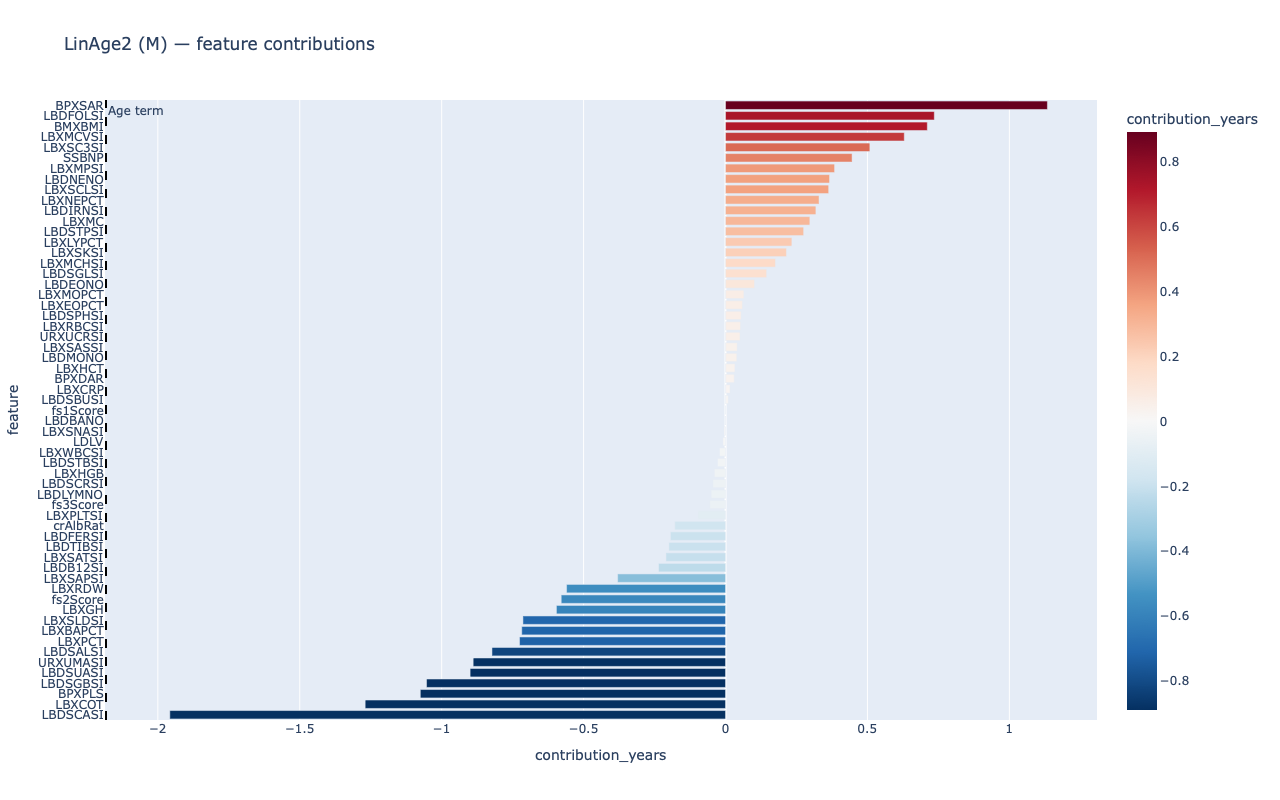

In [124]:
# Assume you already have:
#   Z_centered, w_feature_years, feature_names, term_age
#   and nhanes_desc = {...}  # from the dict I gave you

subject_idx=1

fig = plot_feature_contribs_interactive_np(
    Z_centered,
    w_feature_years,
    dataMat_user,
    feature_names,
    subject_idx=subject_idx,
    title="LinAge2 (M) — feature contributions",
    term_age=float(term_age[subject_idx]) if hasattr(term_age, "__getitem__") else term_age,
    descriptions=nhanes_desc
)
fig.show()


In [110]:
fig.write_html('figure_example.html', include_plotlyjs="cdn", full_html=True)